In [1]:
from quests_data import *

import itertools
import seaborn as sns
from ase.io import read
from quests.tools.plotting import savefig, COLORS

In [2]:
def clean_filename(name):
    return name.split("/")[-1].strip(".xyz")

def get_int(name):
    match = re.findall("[0-9]+", name)[0]
    return int(match)

## Analysis of the entropy on a per-generation basis

In [3]:
DATA = "../data/02-Aluminum/H"
files = sorted(os.listdir(DATA))

H = []
for file in files:
    with open(os.path.join(DATA, file), "r") as f:
        data = json.load(f)
    H.append(data)    

H = pd.DataFrame(H)
H["gen"] = H["file"].apply(get_int)

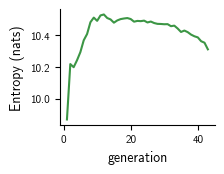

In [4]:
fig, ax = plt.subplots(figsize=(2, 1.5))

ax.plot(H["gen"], H["entropy"], color=COLORS["fcc"])
ax.set_ylabel("Entropy (nats)")
ax.set_xlabel("generation")

# savefig(fig, "04-info-aluminum.pdf")
plt.show()

## Analysis of the novelty and $\delta$H

In [5]:
DATA = "../data/02-Aluminum/dH"
files = sorted(os.listdir(DATA))

dH = []
for file in files:
    with open(os.path.join(DATA, file), "r") as f:
        data = json.load(f)
    
    data.pop("bandwidth")
    data["ref"] = get_int(data.pop("reference_file"))
    data["test"] = get_int(data.pop("test_file"))
    for delta in data.pop("delta_entropy"):
        dH.append({
            **data,
            "dH": delta,
        })

dH = pd.DataFrame(dH)

In [6]:
new_envs = np.array([
    np.mean(grp["dH"].values >= 0)
    for gen, grp in dH.groupby("test")
    if gen != 1
]) * 100
gens = np.arange(2, 44)

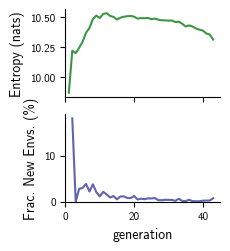

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(2, 2.5), sharex=True)

ax = axs[0]
ax.plot(H["gen"], H["entropy"], color=COLORS["fcc"])
ax.set_ylabel("Entropy (nats)")

ax = axs[1]
ax.plot(gens, new_envs, color=COLORS["bcc"])
ax.set_ylabel("Frac. New Envs. (%)")
ax.set_xlabel("generation")
ax.set_ylim(0)
ax.set_xlim(0)

# savefig(fig, "04-info-aluminum.pdf")
plt.show()

## Measure of diversity

Diversity can be computed by taking the values of $\delta H (\mathbf{X}_i | \{\mathbf{X}\}),\ \mathbf{X}_i \in \{\mathbf{X}\}$, which is available in the folder `D` below:

In [10]:
DATA = "../data/02-Aluminum/D"
files = sorted(os.listdir(DATA))

sdH = []
for file in files:
    with open(os.path.join(DATA, file), "r") as f:
        data = json.load(f)
    
    data.pop("bandwidth")
    data["ref"] = get_int(data.pop("reference_file"))
    data["test"] = get_int(data.pop("test_file"))
    for delta in data.pop("delta_entropy"):
        sdH.append({
            **data,
            "dH": delta,
        })

sdH = pd.DataFrame(sdH)

In [11]:
div = []
for gen, grp in sdH.groupby("ref"):
    D = np.sum(np.exp(grp["dH"].values))
    div.append({
        "gen": gen,
        "D": D,
        "logD": np.log(D),
        "n": len(grp),
        "logn": np.log(len(grp)),
    })
    
div = pd.DataFrame(div)

## Final plot

/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_84100/1337803784.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_84100/1337803784.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_84100/1337803784.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)


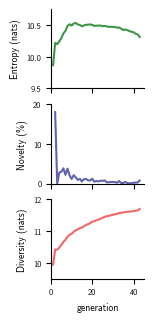

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(1.2, 3.5), sharex=True)

ax = axs[0]
ax.plot(H["gen"], H["entropy"], color=COLORS["fcc"])
ax.set_ylabel("Entropy (nats)", fontsize=7)
ax.set_ylim(9.5, 10.75)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)

ax = axs[1]
ax.plot(gens, new_envs, color=COLORS["bcc"])
ax.set_ylabel("Novelty (%)", fontsize=7)
# ax.set_xlabel("generation")
ax.set_ylim(0)
ax.set_xlim(0)
ax.set_ylim(0, 20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)

ax = axs[2]
ax.plot(div["gen"], div["logD"], color=COLORS["hcp"])
ax.set_ylabel("Diversity (nats)", fontsize=7)
ax.set_xlabel("generation", fontsize=7)
ax.set_ylim(9.5, 12)
ax.set_xlim(0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
ax.set_xticks([0, 20, 40])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)

# savefig(fig, "04-dset-aluminum.pdf")
plt.show()

/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_3801/2724192875.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_3801/2724192875.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
webf NOT subset; don't know how to subset; dropped


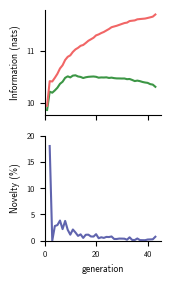

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(1.5, 3.0), sharex=True)

ax = axs[0]
ax.plot(H["gen"], H["entropy"], color=COLORS["fcc"], label="Entropy")
ax.set_ylabel("Information (nats)", fontsize=7)

ax.plot(div["gen"], div["logD"], color=COLORS["hcp"], label="Diversity")

# ax.set_ylim(9.5, 12)
ax.set_xlim(0)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)

ax = axs[1]
ax.plot(gens, new_envs, color=COLORS["bcc"])
ax.set_ylabel("Novelty (%)", fontsize=7)
ax.set_ylim(0)
ax.set_xlim(0)
ax.set_ylim(0, 20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=6)
ax.set_xticks([0, 20, 40])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
ax.set_xlabel("generation", fontsize=7)

savefig(fig, "04-dset-aluminum.pdf")
plt.show()